<h1 id="basics" style="font-family:verdana;"> 
    <center> A/B Testing for the Sales Conversion Optimization
    </center>
</h1>
<div style="width:100%;text-align: center;"> <img align=middle src="https://ik.imagekit.io/ccyubla1p9v/wp-content/uploads/2019/02/AB-Testing.png" alt="A/B Testing" style="height:500px;margin-top:1rem;"> </div>



The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1. ad_id: an unique ID for each ad.

2. xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3. fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4. age: age of the person to whom the ad is shown.

5. gender: gender of the person to whim the add is shown

6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7. Impressions: the number of times the ad was shown.

8. Clicks: number of clicks on for that ad.

9. Spent: Amount paid by company xyz to Facebook, to show that ad.

10. Total conversion: Total number of people who enquired about the product after seeing the ad.

11. Approved conversion: Total number of people who bought the product after seeing the ad.

## Main topics of the study can be seen below:

* [Aim of the study](#section-one)
* [Understanding the data](#section-two)
* [Preparation of data](#section-three)
* [What is the A/B Testing](#section-four)
* [A/B Testing Model Process](#section-five)
* [Hypothesis](#section-six)
* [Assumption Control](#section-seven)
    * [Normal Distribution](#section-eight)
    * [Variance Homogeneity Assumption](#section-nine)
* [Apply of the Hypothesis](#section-ten)
* [Conclusion and Reccomendation](#section-eleven)



<a id="section-one"></a>
## 1. Aim of the Study

This dataset includes A/B test results of Sales and impressions of the two advertising method. To examine what happens when the two methods use for the advertising process and to see difference the results are occurred accidentally or not. In this study, we will try to find out whether methods effected to sales or impressions or not.

<div style="width:100%;text-align: center;"> <img align=middle src="https://devopedia.org/images/article/32/6055.1530296772.jpg" alt="A/B Testing" style="height:500px;margin-top:1rem;"> </div>

<a id="section-two"></a>
## 2. Understanding the Data

First of all we should import the libraries that will use during the analysis process.

In [1]:
# Lets import the dataset

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, \
    kendalltau, f_oneway, kruskal

In [2]:
# Lets import the dataset

df = pd.read_csv(r"/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv", encoding= 'unicode_escape')

In [3]:
# To understand the "check_df" functione can be used to decide the what should we do about the data.

def check_df(dataframe, head=5):
    print("########## Info #############")
    print(dataframe.info())
    print("########## Shape #############")
    print(dataframe.shape)
    print("########## Data Types #############")
    print(dataframe.dtypes)
    print("########## Head of Data #############")
    print(dataframe.head(head))
    print("########## Tail of Data #############")
    print(dataframe.tail(head))
    print("########## Null Values of Data #############")
    print(dataframe.isnull().sum())
    print("########## Describe of the Numerical Datas #############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None
########## Shape #############
(1143, 11)
########## Data Types #############
ad_id                    int64
xyz_campaign_id          int64
fb_ca

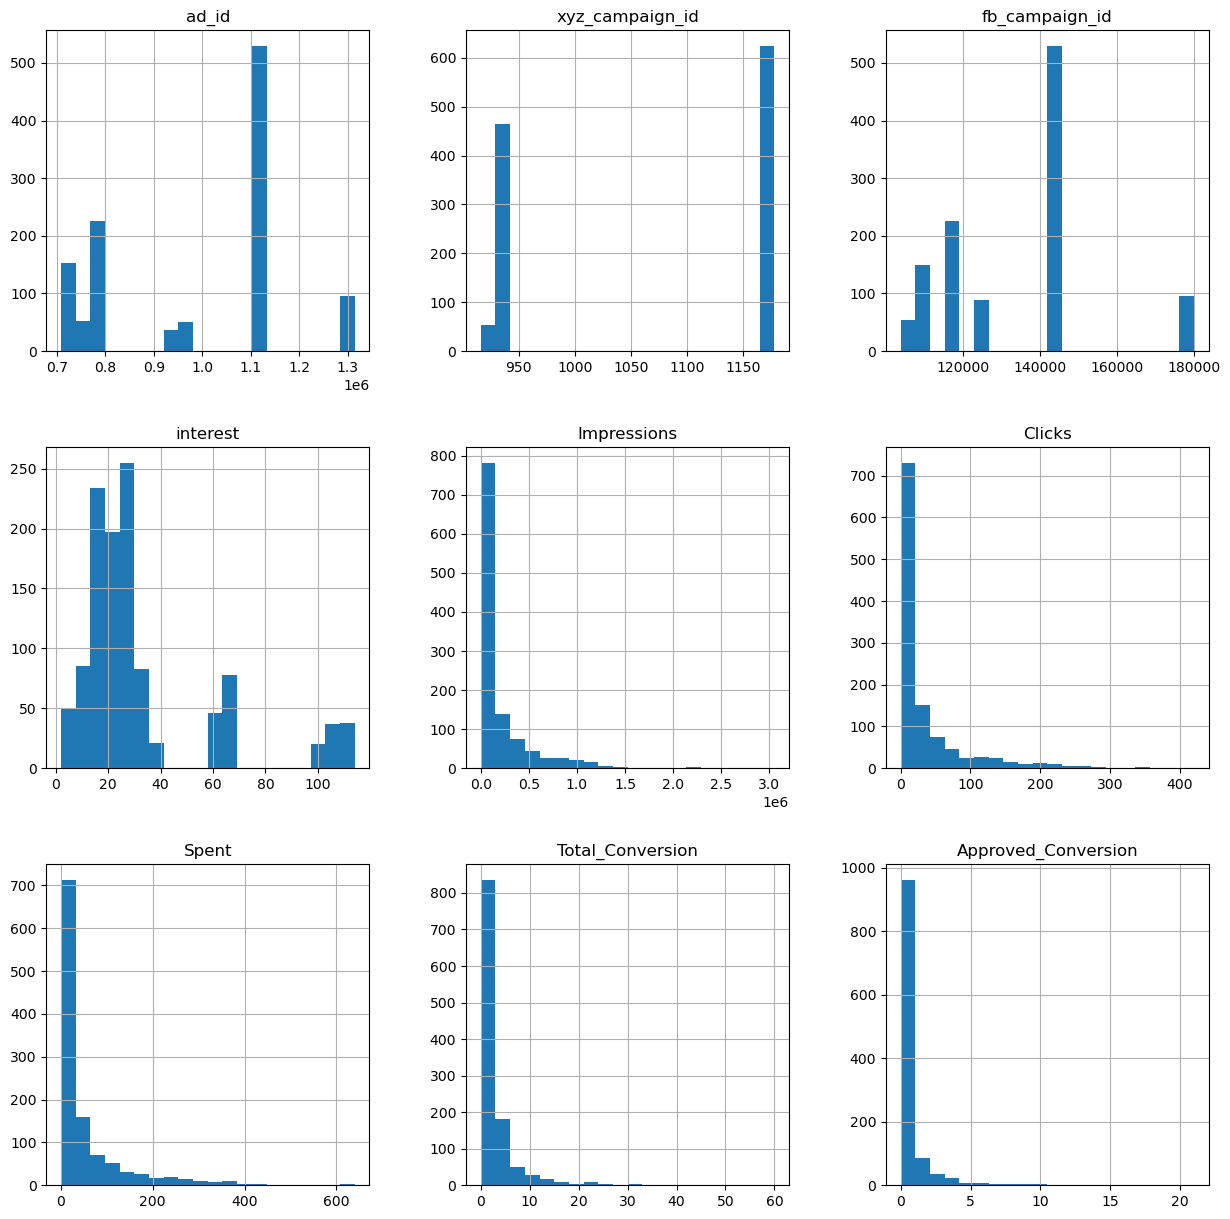

In [4]:
# Lets see the general distrubition of the numerical variables

axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

Before the start the analysis, according to dataset summary, dataset has 5 variables. Lets check them;

1. ad_id: an unique ID for each ad.
2. xyz_campaign_id: an ID associated with each ad campaign of XYZ company.
3. Approved conversion: Total number of people who bought the product after seeing the ad.
4. age: age of the person to whom the ad is shown.
5. gender: gender of the person to whim the add is shown

According to quick analysis of the data, dataset does not have any null data and all userids are used as individually.


<a id="section-three"></a>
## 3. Preparation of the Data

In this stage, If any null values are in the dataset, they will drop it from the data.

In [5]:
# dropna() command will help to drop the null values from the data.
df.shape
df.isnull().sum()
df.dropna(inplace = True)

# Lets check the data

df.describe().T


,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


<a id="section-four"></a>
## 4. What is the A/B Testing

<div style="width:100%;text-align: center;"> <img align=middle src="https://sp-ao.shortpixel.ai/client/to_auto,q_glossy,ret_img,w_900/https://www.brillmark.com/wp-content/uploads/2021/03/What-is-AB-Testing.png" alt="A/B Testing" style="height:300px;margin-top:1rem;"> </div>

> A/B testing (also known as split testing or bucket testing) is a methodology for comparing two versions of a webpage or app against each other to determine which one performs better. A/B testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

> Running an A/B test that directly compares a variation against a current experience lets you ask focused questions about changes to your website or app and then collect data about the impact of that change.

> Testing takes the guesswork out of website optimization and enables data-informed decisions that shift business conversations from "we think" to "we know." By measuring the impact that changes have on your metrics, you can ensure that every change produces positive results.


<a id="section-five"></a>
## 5. A/B Testing Model Process

To apply the A/B Testing for the dataset we should have follow the fundamental steps according to literature of the A/B Testing. These steps can be seen below:

1. Hypothesis
2. Assumptions Control
3. Apply of the Hyphothesis

<a id="section-six"></a>
## 6. Hypothesis

First step of the A/B Testing we should define the "Hypothesis". It means, which condition or situation will be tested in the dataset and what is the boundaries of the hypothesis step.

According to literature, A/B testing has two hyphtohesises H0 and H1. Lets explain these hypothesises.

> A statistical hypothesis is an assertion or conjecture concerning one or more populations. To prove that a hypothesis is true, or false, with absolute certainty, we would need absolute knowledge. That is, we would have to examine the entire population. Instead, hypothesis testing concerns on how to use a random sample to judge if it is evidence that supports or not the hypothesis.

Hypothesis testing is formulated in terms of two hypotheses:
- H0: the null hypothesis;
- H1: the alternate hypothesis.
    
    
The hypothesis we want to test is if H1 is “likely” true. So, there are two possible outcomes:
- Reject H0 and accept H1 because of sufficient evidence in the sample in favor or H1;
- Do not reject H0 because of insufficient evidence to support H1.

Note that failure to reject H0 does not mean the null hypothesis is true. There is no formal outcome that says “accept H0.” It only means that we do not have sufficient evidence to support H1.

<a id="section-seven"></a>
## 7. Assumption Control

<a id="section-eight"></a>
### 7.1 Normal Distribution

To understand if the mean of a sample is significantly different from the population mean (μ), we need to perform a Z-test. At the moment we are interested in a two-tails test that is formulated as:

H0: m = m0 – Null hypothesis – The mean of our sample (m or X-bar) is not different to the value m0.
H1: m ≠ m0 – Alternative hypothesis – The mean of our sample (m) is different to the value m0.

The Z-score is calculated based on the formula below:

<div style="width:100%;text-align: center;"> <img align=middle src="https://i.stack.imgur.com/z0zgw.png" alt="A/B Testing" style="height:300px;margin-top:1rem;"> </div>

- X-bar: sample mean
- μ: population meean
- σ: population standard deviation



In [6]:
####################################
# Normal Distribution
####################################

# H0: Normal distribution assumption is true.
# H1: False.

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

# Normal Distribution control for Id 939

test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 936, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# Normal Distribution control for Id 1178

test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# According to p-values, H0 = Reject

Test Stat = 0.3912, p-value = 0.0000
Test Stat = 0.6933, p-value = 0.0000


<a id="section-nine"></a>
### 7.2 Variance Homogeneity Assumption

The assumption of homogeneity of variance means that the level of variance for a particular variable is constant across the sample. If you’ve collected groups of data then this means that the variance of your outcome variable(s) should be the same in each of these groups (i.e. across schools, years, testing groups or predicted values).

In [7]:
####################################
# Variance Homogeneity Assumption:
####################################

# H0: Variance is homogeneous.
# H1: Variance is not homogeneous.

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

test_stat, pvalue = levene(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# According to p-values, H0 =  Cannot Reject

Test Stat = 2.3178, p-value = 0.1285


<a id="section-ten"></a>
## 8. Apply of the Hypothesis

According to "Normal Distribution" and "Variance Homogeneity Assumption" controls shown that the first control H0 = reject, and the second one is H0 = Cannot reject. It means, we should use the mannwtihneyu() command to apply of the hypothesis.

The Mann-Whitney test is based on a comparison of every observation xi in the first sample with every observation yj in the other sample. The total number of pairwise comparisons that can be made is nxny.

In [8]:
####################################
# Apply of the Hypothesis:
####################################

test_stat, pvalue = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

Test Stat = 13311.5000, p-value = 0.4520


<a id="section-eleven"></a>
## 9. Conclusion and Recommendation

According to A/B Testing results to find out the effect of the "936" and "936" are effected to the total impressions of the sales?

In the first of testing process, we ask as "means are equal or not" for the case study that shared above. To find out it, firstly checked normal distribution and variance homogeneity assumption are distributed normal or not? A/B testing says that if Normal Distribution is not equal, you should use the Mann-Whitney U test to find out the effect of the "gate_30" and "gate_40". 

The result of the Mann-Whitney U test, p-value calculated as 0.4520, and it means H0 = Cannot Reject according to Hypothesis assumption, and its meaning for the A/B Testing, both advertesing strategy results are occurred just accidentally. 


## Keep in Touch!

You can follow my the other social media adresses to see this kind of works!

1. [GitHub](https://github.com/KeskinHakan)
2. [LinkedIn](https://www.linkedin.com/in/hakan-keskin-/)
3. [Medium](https://medium.com/@hakan-keskin)
